<a href="https://colab.research.google.com/github/Aibatyr11/Aibatyr11/blob/main/ML1_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Установка Flask

!pip install flask
# Установка Node.js и npm (только если они ещё не установлены)
!apt update
!apt install -y nodejs npm
# Установка LocalTunnel
!npm install -g localtunnel

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,105 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,437 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [ ]:
import pandas as pd

import sklearn

sklearn.set_config(transform_output = 'pandas')

df = pd.read_csv('/content/answers_FOR_NIS.csv')



display(df.head())

,student_id,entry_date,school_name,Breakfast,Dinner,Lunch,Total,activityType,duration,intensity,...,burnoutQ16,burnoutQ17,burnoutQ18,burnoutQ19,burnoutQ20,burnoutQ21,burnoutQ22,wellbeingHours0,wellbeingHours,wellbeingHours1
0,121,2006-01-01,nis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Never,Never,Never,Never,Never,Never,NaN,NaN,NaN
1,1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Never,Never,Never,Never,Never,Never,NaN,NaN,NaN
2,10A24,2024-09-10,NIS FMN,394.0,436.0,365.0,1195.0,Walking,72.0,484.0,...,Very Rarely,Often,Very Often,Very Often,Never,Very Often,Very Often,6.0,6.0,3.0
3,10A1,2024-09-17,NIS FMN,597.0,303.0,683.0,1583.0,Walking,17.0,352.0,...,Never,Never,Never,Never,Never,Never,Never,6.0,7.0,1.0
4,10A1,2024-09-11,NIS FMN,403.0,447.0,86.0,936.0,Walking,23.0,354.0,...,Often,Every Day,Every Day,Every Day,Very Rarely,Often,Never,7.0,5.0,3.0


In [ ]:
# ваши вопросы называются burnoutQ1, burnoutQ2, ..., burnoutQ22

questions = [f'burnoutQ{i}' for i in range(1, 23)]



# Словарь для замены значений

mapping = {

    'Never': 0,

    'Very Rarely': 1,

    'Often': 2,

    'Sometimes': 3,

    'Very Often': 4,

    'Every Day': 5

}



# Применяем замены ко всем вопросам

for question in questions:

    # Преобразуем значения в строку и затем удаляем лишние пробелы

    df[question] = df[question].astype(str).str.strip().str.title()



    # Преобразование значений

    df[question] = df[question].replace(mapping)



    # Заменить NaN на -1 или любое другое значение по умолчанию

    df[question] = df[question].fillna(-1)  # Или на любое другое значение



    # Вывод уникальных значений для каждого вопроса после замены

for question in questions:

    unique_values = df[question].unique()

    print(f"Уникальные значения для {question}: {unique_values}")


<ipython-input-3-62151e1b9f0f>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[question] = df[question].replace(mapping)
<ipython-input-3-62151e1b9f0f>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[question] = df[question].replace(mapping)
<ipython-input-3-62151e1b9f0f>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

Уникальные значения для burnoutQ1: [0 1 3 2 4 5]
Уникальные значения для burnoutQ2: [0 2 5 4 3 1]
Уникальные значения для burnoutQ3: [0 1 3 5 2 4]
Уникальные значения для burnoutQ4: [0 3 5 2 4 1]
Уникальные значения для burnoutQ5: [0 1 2 4 3 5]
Уникальные значения для burnoutQ6: [0 2 5 4 3 1]
Уникальные значения для burnoutQ7: [0 4 5 1 2 3]
Уникальные значения для burnoutQ8: [0 5 2 3 1 4]
Уникальные значения для burnoutQ9: [0 4 5 2 3 1]
Уникальные значения для burnoutQ10: [0 4 2 1 3 5]
Уникальные значения для burnoutQ11: [0 3 1 2 5 4]
Уникальные значения для burnoutQ12: [0 4 5 3 1 2]
Уникальные значения для burnoutQ13: [0 2 3 1 4 5]
Уникальные значения для burnoutQ14: [0 1 2 3 4 5]
Уникальные значения для burnoutQ15: [0 4 3 1 2 5]
Уникальные значения для burnoutQ16: [0 1 2 4 3 5]
Уникальные значения для burnoutQ17: [0 2 5 3 4 1]
Уникальные значения для burnoutQ18: [0 4 5 2 3 1]
Уникальные значения для burnoutQ19: [0 4 5 2 3 1]
Уникальные значения для burnoutQ20: [0 1 3 4 2 5]
Уникальны

<ipython-input-3-62151e1b9f0f>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[question] = df[question].replace(mapping)
<ipython-input-3-62151e1b9f0f>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[question] = df[question].replace(mapping)
<ipython-input-3-62151e1b9f0f>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [ ]:
df['student_id'].fillna(0, inplace=True)

df['Breakfast'].fillna(0, inplace=True)

df['Dinner'].fillna(0, inplace=True)

df['Lunch'].fillna(0, inplace=True)

df['school_name'].fillna(0, inplace=True)

df['entry_date'].fillna(0, inplace=True)

df['activityType'].fillna(0, inplace=True)

df['duration'].fillna(0, inplace=True)

df['intensity'].fillna(0, inplace=True)

df['Total'].fillna(0, inplace=True)

df['wellbeingHours0'].fillna(0, inplace=True)

df['wellbeingHours'].fillna(0, inplace=True)

df['wellbeingHours1'].fillna(0, inplace=True)

<ipython-input-4-5d9250216150>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['student_id'].fillna(0, inplace=True)
<ipython-input-4-5d9250216150>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [ ]:
df.isna().sum()

,0
student_id,0
entry_date,0
school_name,0
Breakfast,0
Dinner,0
Lunch,0
Total,0
activityType,0
duration,0
intensity,0


In [ ]:
print(df['wellbeingHours0'].unique())

# Удаление строк с ненужными значениями

values_to_remove = [ 15.0, 16.0, 14.0, 13.0, 11.0, 12.0, 10,0 ]

df = df[~df['wellbeingHours0'].isin(values_to_remove)]

print(df['wellbeingHours0'].unique())

print(df['wellbeingHours'].unique())

# Удаление строк с ненужными значениями

values_to_remove = [ 10., 12.0, 11.0, 15.0,13.0, 99.0, 9,0 ]

df = df[~df['wellbeingHours'].isin(values_to_remove)]

print(df['wellbeingHours'].unique())

print(df['wellbeingHours1'].unique())

# Удаление строк с ненужными значениями

values_to_remove = [ 10., 12.0, 11.0, 16.0,13.0, 15.0, 14.0, 33.0 ]

df = df[~df['wellbeingHours1'].isin(values_to_remove)]

print(df['wellbeingHours1'].unique())

[0. 6. 7. 8.]
[6. 7. 8.]
[6. 7. 5. 2. 3. 4.]
[6. 7. 5. 2. 3. 4.]
[3. 1. 2.]
[3. 1. 2.]


In [ ]:
# Суммируем значения между столбцами Breakfast и Dinner

df['total_meals'] = df['Breakfast'] + df['Dinner']+df['Lunch']



#print(df[['student_id', 'Breakfast', 'Dinner', 'total_meals']])





# Выбираем случайные 25 значений из total_meals

random_meals = df['total_meals'].sample(n=25, random_state=25)  # Укажите random_state для воспроизводимости



# Выводим случайные значения total_meals

print("Случайные значения total_meals:")

print(random_meals)

Случайные значения total_meals:
5375    1630.0
145     1652.0
1589    1012.0
2954    1418.0
355     1648.0
984     1552.0
7778    1358.0
4782    1228.0
1614    1544.0
3624    1423.0
8570    1391.0
1792    1520.0
2107    1581.0
5992    1241.0
6015    1467.0
280     1436.0
3941    1877.0
5541    1133.0
6746    2034.0
5004    1256.0
8990     974.0
5332    1218.0
3844    1073.0
7099    1390.0
6084    1633.0
Name: total_meals, dtype: float64


In [ ]:
import pandas as pd



# Предположим, что df — ваш DataFrame



# Замена всех значений в school_name на 'DKU'

df['school_name'] = 'NIS'



# Проверка результата

print(df['school_name'].value_counts())


school_name
NIS    9268
Name: count, dtype: int64


In [ ]:
# Удаление строк с ненужными значениями
values_to_remove = ['121', '1223', '0', '2024' ]
df = df[~df['student_id'].isin(values_to_remove)]

# Ключ: «Психоэмоциональное истощение» – ответы по пунктам 1, 2, 3, 6, 8, 13, 14, 16, 20. (максимальная сумма баллов – 54)

# «Редукция личных достижений» – ответы да по пунктам 4, 7, 9, 12, 17, 18, 19, 21 (максимальная сумма баллов – 48)

# «Деперсонализация» – ответы «да» по пунктам 5, 10, 11, 15, 22 (максимальная сумма баллов – 30)

In [ ]:
# Пример: создание DataFrame df2 из существующего df

df2 = df.copy()

#«Психоэмоциональное истощение»

# Список столбцов с вопросами, которые нужно суммировать

questions = ['burnoutQ1', 'burnoutQ2', 'burnoutQ3', 'burnoutQ6', 'burnoutQ8',

             'burnoutQ13', 'burnoutQ14', 'burnoutQ16', 'burnoutQ20']



# Убедимся, что все пропуски заполнены значением 0, чтобы корректно считать суммы

df2[questions] = df2[questions].fillna(0)



# Группируем данные по student_id и entry_date и считаем сумму по выбранным вопросам

df2_summed = df2.groupby(['student_id', 'entry_date'])[questions].sum()



# Создаем столбец с общей суммой по вопросам для каждого студента на каждый день

df2_summed['Psycho-emotional exhaustion'] = df2_summed[questions].sum(axis=1)



# Сбрасываем индексы для удобства дальнейшей работы

df2_summed = df2_summed.reset_index()  # Исправлено: здесь нужно использовать df2_summed



# Выводим результат

print('')

print('df2_summed')

print(df2_summed[['student_id', 'entry_date', 'Psycho-emotional exhaustion']])



#«Деперсонализация»

# Список вопросов для суммирования

questions = ['burnoutQ5', 'burnoutQ10', 'burnoutQ11', 'burnoutQ15', 'burnoutQ22']



# Замените 'entry_date' на ваше фактическое название столбца с датами

df3_summed = df2.groupby(['student_id', 'entry_date'])[questions].sum().reset_index()



# Создаем новый столбец с общей суммой по вопросам

df3_summed['Depersonalization'] = df3_summed[questions].sum(axis=1)



# Выводим результат

#print('')

#print('df3_summed')

#print(df3_summed[['student_id', 'entry_date', 'Depersonalization']])



#«Редукция личных достижений»

# Список вопросов для суммирования

questions = ['burnoutQ4', 'burnoutQ7', 'burnoutQ9', 'burnoutQ12', 'burnoutQ17', 'burnoutQ18', 'burnoutQ19', 'burnoutQ21']



# Замените 'entry_date' на ваше фактическое название столбца с датами

df4_summed = df2.groupby(['student_id', 'entry_date'])[questions].sum().reset_index()



# Создаем новый столбец с общей суммой по вопросам

df4_summed['Reduction of personal achievements'] = df4_summed[questions].sum(axis=1)



# Выводим результат

#print('')

#print('df4_summed')

#print(df4_summed[['student_id', 'entry_date', 'Reduction of personal achievements']])



df2_summed
     student_id  entry_date  Psycho-emotional exhaustion
0             0           0                            0
1             0  2024-09-13                            0
2             0  2024-09-14                           50
3             0  2024-09-29                            0
4          10A1  2024-09-10                           38
...         ...         ...                          ...
3680       9F13  2024-09-22                           24
3681       9F13  2024-09-23                           88
3682       9F13  2024-09-24                           24
3683       9F13  2024-09-25                           24
3684       9F13  2024-09-26                           24

[3685 rows x 3 columns]


In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt



df6 = df.copy()  # или создайте df6 из ваших данных, если df не определен



print(df6.columns)



df6 = df6.drop(columns=[col for col in df6.columns if col not in ['entry_date', 'student_id', 'Breakfast', 'Dinner','Lunch','total_meals',

       'wellbeingHours0', 'intensity', 'wellbeingHours', 'wellbeingHours1']])



print ('df6')

print(df6.columns)

Index(['student_id', 'entry_date', 'school_name', 'Breakfast', 'Dinner',
       'Lunch', 'Total', 'activityType', 'duration', 'intensity', 'burnoutQ1',
       'burnoutQ2', 'burnoutQ3', 'burnoutQ4', 'burnoutQ5', 'burnoutQ6',
       'burnoutQ7', 'burnoutQ8', 'burnoutQ9', 'burnoutQ10', 'burnoutQ11',
       'burnoutQ12', 'burnoutQ13', 'burnoutQ14', 'burnoutQ15', 'burnoutQ16',
       'burnoutQ17', 'burnoutQ18', 'burnoutQ19', 'burnoutQ20', 'burnoutQ21',
       'burnoutQ22', 'wellbeingHours0', 'wellbeingHours', 'wellbeingHours1',
       'total_meals'],
      dtype='object')
df6
Index(['student_id', 'entry_date', 'Breakfast', 'Dinner', 'Lunch', 'intensity',
       'wellbeingHours0', 'wellbeingHours', 'wellbeingHours1', 'total_meals'],
      dtype='object')


In [ ]:
print("Столбцы в df6:", df6.columns)

print("")

print("Столбцы в df2_summed:", df2_summed.columns)



# Проверяем, что 'student_id', 'entry_date', и 'Psycho-emotional exhaustion' есть в df2_summed

if 'student_id' in df2_summed.columns and 'entry_date' in df2_summed.columns and 'Psycho-emotional exhaustion' in df2_summed.columns:

    # Объединяем df6 с df2_summed по столбцам 'student_id' и 'entry_date'

    df2_combined = df6.merge(df2_summed[['student_id', 'entry_date', 'Psycho-emotional exhaustion']],

                            on=['student_id', 'entry_date'], how='left')



    # Оставляем только столбцы 'student_id', 'entry_date', и 'Psycho-emotional exhaustion'

    df2_combined = df2_combined[['student_id','entry_date', 'wellbeingHours0', 'intensity', 'wellbeingHours1', 'total_meals', 'Psycho-emotional exhaustion']]







    # Выводим первые несколько строк объединённого DataFrame

    print("")

    print("Объединённый DataFrame для Psycho-emotional exhaustion")

    print(df2_combined.head())

else:

    print("В df2_summed отсутствуют необходимые столбцы.")





print("Столбцы в df3_summed:", df3_summed.columns)

#print("Столбцы в df6:", df6.columns)



# Проверяем, что 'student_id', 'entry_date', и 'Psycho-emotional exhaustion' есть в df2_summed

if 'student_id' in df3_summed.columns and 'entry_date' in df2_summed.columns and 'Depersonalization' in df3_summed.columns:

    # Объединяем df6 с df3_summed по столбцам 'student_id' и 'entry_date'

    df3_combined = df6.merge(df3_summed[['student_id', 'entry_date', 'Depersonalization']],

                            on=['student_id', 'entry_date'], how='left')



    # Оставляем только столбцы 'student_id', 'entry_date', и 'Psycho-emotional exhaustion'

    df3_combined = df3_combined[['student_id','entry_date', 'wellbeingHours0', 'intensity', 'wellbeingHours1', 'total_meals', 'Depersonalization']]







    # Выводим первые несколько строк объединённого DataFrame

    print("")

    print("Объединённый DataFrame для Depersonalization")

    print(df3_combined.head())

else:

    print("В df3_summed отсутствуют необходимые столбцы.")





print("Столбцы в df4_summed:", df4_summed.columns)

#print("Столбцы в df6:", df6.columns)



# Проверяем, что 'student_id', 'entry_date', и 'Psycho-emotional exhaustion' есть в df4_summed

if 'student_id' in df4_summed.columns and 'entry_date' in df4_summed.columns and 'Reduction of personal achievements' in df4_summed.columns:

    # Объединяем df6 с df4_summed по столбцам 'student_id' и 'entry_date'

    df4_combined = df6.merge(df4_summed[['student_id', 'entry_date', 'Reduction of personal achievements']],

                            on=['student_id', 'entry_date'], how='left')



    # Оставляем только столбцы 'student_id', 'entry_date', и 'Psycho-emotional exhaustion'

    df4_combined = df4_combined[['student_id','entry_date', 'wellbeingHours0', 'intensity', 'wellbeingHours1', 'total_meals', 'Reduction of personal achievements']]







    # Выводим первые несколько строк объединённого DataFrame

    print("")

    print("Объединённый DataFrame для Reduction of personal achievements")

    print(df4_combined.head())

else:

    print("В df4_summed отсутствуют необходимые столбцы.")




Столбцы в df6: Index(['student_id', 'entry_date', 'Breakfast', 'Dinner', 'Lunch', 'intensity',
       'wellbeingHours0', 'wellbeingHours', 'wellbeingHours1', 'total_meals'],
      dtype='object')

Столбцы в df2_summed: Index(['student_id', 'entry_date', 'burnoutQ1', 'burnoutQ2', 'burnoutQ3',
       'burnoutQ6', 'burnoutQ8', 'burnoutQ13', 'burnoutQ14', 'burnoutQ16',
       'burnoutQ20', 'Psycho-emotional exhaustion'],
      dtype='object')

Объединённый DataFrame для Psycho-emotional exhaustion
  student_id  entry_date  wellbeingHours0  intensity  wellbeingHours1  \
0      10A24  2024-09-10              6.0      484.0              3.0   
1       10A1  2024-09-17              6.0      352.0              1.0   
2       10A1  2024-09-11              7.0      354.0              3.0   
3       10A1  2024-09-12              8.0      478.0              1.0   
4       10A1  2024-09-13              6.0      496.0              3.0   

   total_meals  Psycho-emotional exhaustion  
0       1195.0  

<ipython-input-18-329cddbb58e6>:69: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X['entry_date'] = X['entry_date'].view(np.int64) / 10**9
<ipython-input-18-329cddbb58e6>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['entry_date'] = X['entry_date'].view(np.int64) / 10**9



--- Итоговые результаты регрессии для всех моделей ---
           Model         MSE        R²
0  Random Forest  149.597546  0.974948

--- Метрики классификации для всех моделей ---
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.915676   0.912698  0.931174  0.921844


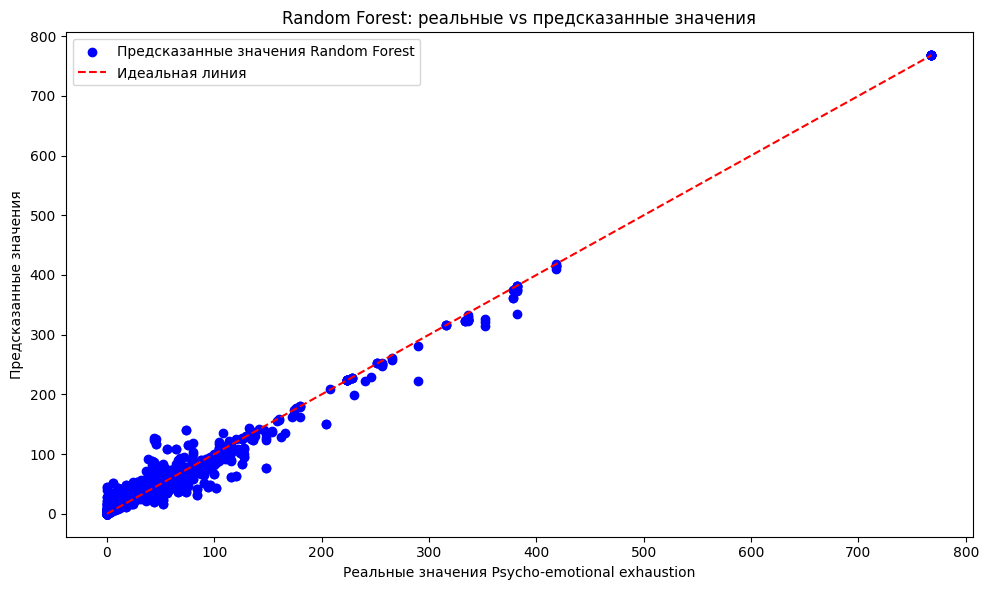

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#from catboost import CatBoostRegressor

from statsmodels.tsa.arima.model import ARIMA

from prophet import Prophet

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score



# Проверка столбцов DataFrame

#print("Столбцы в df2_combined:", df2_combined.columns)



# Инициализация списка для хранения результатов

results = []

classification_results = []



# Проверьте, есть ли 'student_id' в столбцах DataFrame

if 'student_id' in df2_combined.columns:

    # Преобразуем даты, заменяя некорректные значения

    df2_combined['entry_date'] = pd.to_datetime(df2_combined['entry_date'], errors='coerce')



    # Удалим строки с некорректными датами

    df2_combined = df2_combined.dropna(subset=['entry_date'])



    # One-Hot Encoding для 'student_id'

    df2_combined = pd.get_dummies(df2_combined, columns=['student_id'], drop_first=True)



    # Подготовка данных

    X = df2_combined[['entry_date', 'wellbeingHours0', 'intensity', 'wellbeingHours1', 'total_meals'] + list(df2_combined.columns[df2_combined.columns.str.startswith('student_id_')])]

    y = df2_combined['Psycho-emotional exhaustion']



    # Преобразуем 'entry_date' в числовой формат (Unix время)

    X['entry_date'] = X['entry_date'].view(np.int64) / 10**9



    # Разделение на тренировочную и тестовую выборки

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Определение порога классификации по медиане

    threshold = y.median()

    y_test_class = (y_test >= threshold).astype(int)







    ### Random Forest ###

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred_rf)

    r2_rf = r2_score(y_test, y_pred_rf)

    results.append(['Random Forest', mse_rf, r2_rf])



    y_pred_rf_class = (y_pred_rf >= threshold).astype(int)

    accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)

    precision_rf = precision_score(y_test_class, y_pred_rf_class)

    recall_rf = recall_score(y_test_class, y_pred_rf_class)

    f1_rf = f1_score(y_test_class, y_pred_rf_class)

    classification_results.append(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf])









    # Создание таблицы с результатами регрессии

    results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])



    # Создание таблицы с метриками классификации

    classification_df = pd.DataFrame(classification_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



    # Вывод итоговых таблиц

    print("\n--- Итоговые результаты регрессии для всех моделей ---")

    print(results_df)



    print("\n--- Метрики классификации для всех моделей ---")

    print(classification_df)



    # Визуализация результатов для каждой модели

    def plot_results(y_test, y_pred, model_name):

        plt.figure(figsize=(10, 6))

        plt.scatter(y_test, y_pred, color='blue', label=f'Предсказанные значения {model_name}')

        plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальная линия')

        plt.title(f'{model_name}: реальные vs предсказанные значения')

        plt.xlabel('Реальные значения Psycho-emotional exhaustion')

        plt.ylabel('Предсказанные значения')

        plt.legend()

        plt.tight_layout()

        plt.show()



    # Визуализация для каждой модели



    plot_results(y_test, y_pred_rf, "Random Forest")









else:

    print("Столбец 'student_id' не найден в данных.")


<ipython-input-19-1019c7937814>:69: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X['entry_date'] = X['entry_date'].view(np.int64) / 10**9
<ipython-input-19-1019c7937814>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['entry_date'] = X['entry_date'].view(np.int64) / 10**9



--- Итоговые результаты регрессии для всех моделей ---
           Model       MSE        R²
0  Random Forest  25.27366  0.969258

--- Метрики классификации для всех моделей ---
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.943243   0.962243  0.921139  0.941242


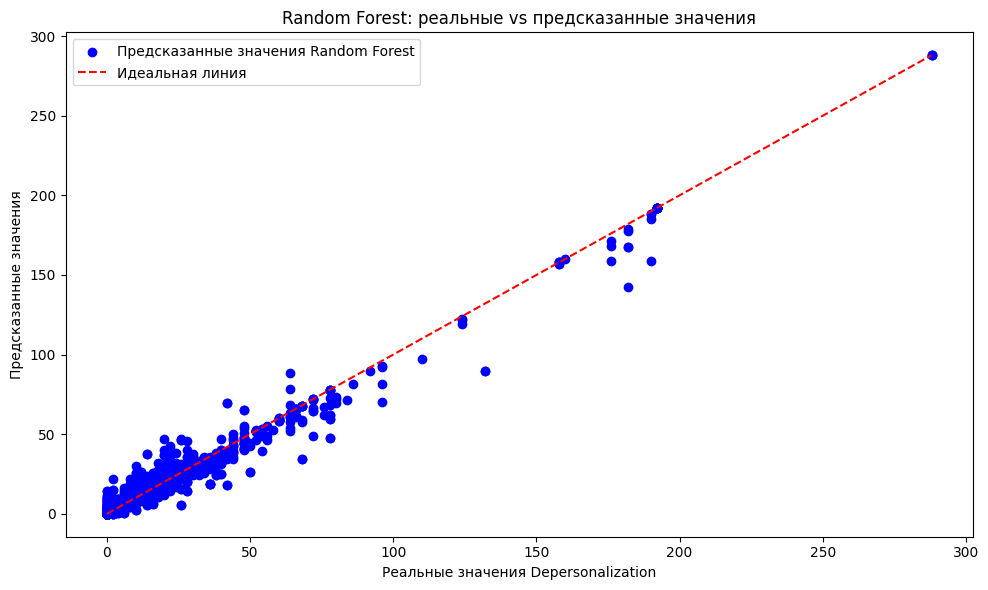

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#from catboost import CatBoostRegressor

from statsmodels.tsa.arima.model import ARIMA

from prophet import Prophet

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score



# Проверка столбцов DataFrame

#print("Столбцы в df2_combined:", df2_combined.columns)



# Инициализация списка для хранения результатов

results = []

classification_results = []



# Проверьте, есть ли 'student_id' в столбцах DataFrame

if 'student_id' in df3_combined.columns:

    # Преобразуем даты, заменяя некорректные значения

    df3_combined['entry_date'] = pd.to_datetime(df3_combined['entry_date'], errors='coerce')



    # Удалим строки с некорректными датами

    df3_combined = df3_combined.dropna(subset=['entry_date'])



    # One-Hot Encoding для 'student_id'

    df3_combined = pd.get_dummies(df3_combined, columns=['student_id'], drop_first=True)



    # Подготовка данных

    X = df3_combined[['entry_date', 'wellbeingHours0', 'intensity', 'wellbeingHours1', 'total_meals'] + list(df3_combined.columns[df3_combined.columns.str.startswith('student_id_')])]

    y = df3_combined['Depersonalization']



    # Преобразуем 'entry_date' в числовой формат (Unix время)

    X['entry_date'] = X['entry_date'].view(np.int64) / 10**9



    # Разделение на тренировочную и тестовую выборки

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Определение порога классификации по медиане

    threshold = y.median()

    y_test_class = (y_test >= threshold).astype(int)







    ### Random Forest ###

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred_rf)

    r2_rf = r2_score(y_test, y_pred_rf)

    results.append(['Random Forest', mse_rf, r2_rf])



    y_pred_rf_class = (y_pred_rf >= threshold).astype(int)

    accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)

    precision_rf = precision_score(y_test_class, y_pred_rf_class)

    recall_rf = recall_score(y_test_class, y_pred_rf_class)

    f1_rf = f1_score(y_test_class, y_pred_rf_class)

    classification_results.append(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf])









    # Создание таблицы с результатами регрессии

    results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])



    # Создание таблицы с метриками классификации

    classification_df = pd.DataFrame(classification_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



    # Вывод итоговых таблиц

    print("\n--- Итоговые результаты регрессии для всех моделей ---")

    print(results_df)



    print("\n--- Метрики классификации для всех моделей ---")

    print(classification_df)



    # Визуализация результатов для каждой модели

    def plot_results(y_test, y_pred, model_name):

        plt.figure(figsize=(10, 6))

        plt.scatter(y_test, y_pred, color='blue', label=f'Предсказанные значения {model_name}')

        plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальная линия')

        plt.title(f'{model_name}: реальные vs предсказанные значения')

        plt.xlabel('Реальные значения Depersonalization')

        plt.ylabel('Предсказанные значения')

        plt.legend()

        plt.tight_layout()

        plt.show()



    # Визуализация для каждой модели



    plot_results(y_test, y_pred_rf, "Random Forest")









else:

    print("Столбец 'student_id' не найден в данных.")


<ipython-input-20-90fa445ef89b>:65: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X['entry_date'] = X['entry_date'].view(np.int64) / 10**9
<ipython-input-20-90fa445ef89b>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['entry_date'] = X['entry_date'].view(np.int64) / 10**9



--- Итоговые результаты регрессии для всех моделей ---
           Model         MSE        R²
0  Random Forest  276.814704  0.958284

--- Метрики классификации для всех моделей ---
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.918378   0.915237  0.931211  0.923155


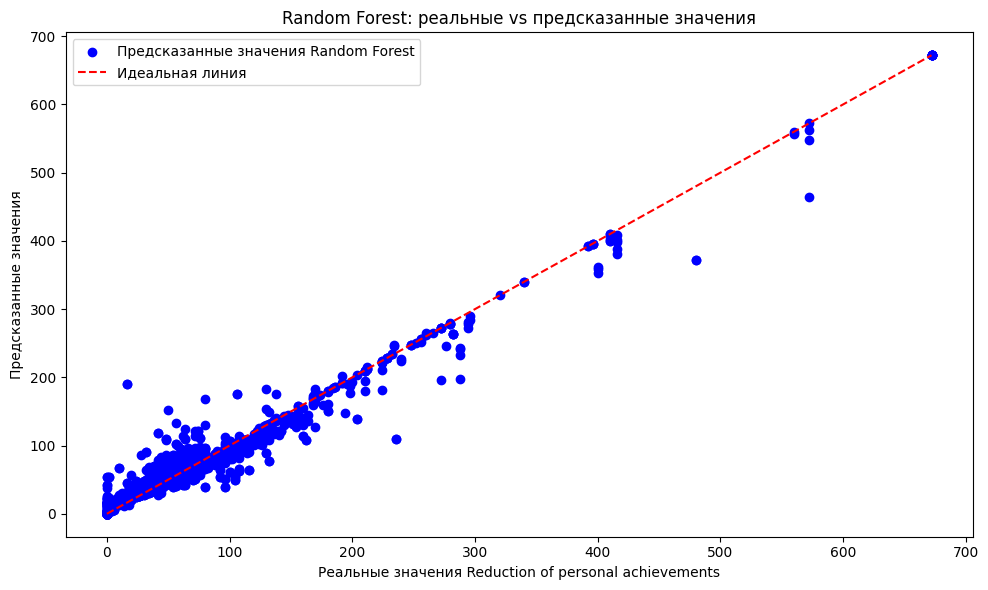

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#from catboost import CatBoostRegressor

from statsmodels.tsa.arima.model import ARIMA

from prophet import Prophet

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score





# Инициализация списка для хранения результатов

results = []

classification_results = []



# Проверьте, есть ли 'student_id' в столбцах DataFrame

if 'student_id' in df4_combined.columns:

    # Преобразуем даты, заменяя некорректные значения

    df4_combined['entry_date'] = pd.to_datetime(df4_combined['entry_date'], errors='coerce')



    # Удалим строки с некорректными датами

    df4_combined = df4_combined.dropna(subset=['entry_date'])



    # One-Hot Encoding для 'student_id'

    df4_combined = pd.get_dummies(df4_combined, columns=['student_id'], drop_first=True)



    # Подготовка данных

    X = df4_combined[['entry_date', 'wellbeingHours0', 'intensity', 'wellbeingHours1', 'total_meals'] + list(df4_combined.columns[df4_combined.columns.str.startswith('student_id_')])]

    y = df4_combined['Reduction of personal achievements']



    # Преобразуем 'entry_date' в числовой формат (Unix время)

    X['entry_date'] = X['entry_date'].view(np.int64) / 10**9



    # Разделение на тренировочную и тестовую выборки

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Определение порога классификации по медиане

    threshold = y.median()

    y_test_class = (y_test >= threshold).astype(int)







    ### Random Forest ###

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred_rf)

    r2_rf = r2_score(y_test, y_pred_rf)

    results.append(['Random Forest', mse_rf, r2_rf])



    y_pred_rf_class = (y_pred_rf >= threshold).astype(int)

    accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)

    precision_rf = precision_score(y_test_class, y_pred_rf_class)

    recall_rf = recall_score(y_test_class, y_pred_rf_class)

    f1_rf = f1_score(y_test_class, y_pred_rf_class)

    classification_results.append(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf])









    # Создание таблицы с результатами регрессии

    results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])



    # Создание таблицы с метриками классификации

    classification_df = pd.DataFrame(classification_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



    # Вывод итоговых таблиц

    print("\n--- Итоговые результаты регрессии для всех моделей ---")

    print(results_df)



    print("\n--- Метрики классификации для всех моделей ---")

    print(classification_df)



    # Визуализация результатов для каждой модели

    def plot_results(y_test, y_pred, model_name):

        plt.figure(figsize=(10, 6))

        plt.scatter(y_test, y_pred, color='blue', label=f'Предсказанные значения {model_name}')

        plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальная линия')

        plt.title(f'{model_name}: реальные vs предсказанные значения')

        plt.xlabel('Реальные значения Reduction of personal achievements')

        plt.ylabel('Предсказанные значения')

        plt.legend()

        plt.tight_layout()

        plt.show()



    # Визуализация для каждой модели



    plot_results(y_test, y_pred_rf, "Random Forest")









else:

    print("Столбец 'student_id' не найден в данных.")


# Готовая модель для отправки параметров модели

In [ ]:
import json

import requests

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score



# Пример данных

data = {

    'entry_date': pd.date_range(start='2024-01-01', periods=1000, freq='D'),

    'wellbeingHours0': np.random.rand(1000) * 10,

    'intensity': np.random.rand(1000) * 10,

    'wellbeingHours1': np.random.rand(1000) * 10,

    'total_meals': np.random.rand(1000) * 10,

    'Reduction of personal achievements': np.random.rand(1000) * 10,

    'student_id_1': np.random.randint(0, 2, 1000),

    'student_id_2': np.random.randint(0, 2, 1000)

}



df4_combined = pd.DataFrame(data)



# Преобразуем 'entry_date' в числовой формат (Unix время) с использованием astype

df4_combined['entry_date'] = pd.to_datetime(df4_combined['entry_date'])

df4_combined['entry_date'] = df4_combined['entry_date'].astype(np.int64) // 10**9



# Подготовка данных

X = df4_combined[['entry_date', 'wellbeingHours0', 'intensity', 'wellbeingHours1', 'total_meals', 'student_id_1', 'student_id_2']]

y = df4_combined['Reduction of personal achievements']



# Разделение на тренировочную и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Обучение модели RandomForest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)



# Предсказания

y_pred_rf = rf_model.predict(X_test)



# Метрики

mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)



# Преобразование предсказаний в классификацию (по медиане)

threshold = y.median()

y_test_class = (y_test >= threshold).astype(int)

y_pred_rf_class = (y_pred_rf >= threshold).astype(int)



# Метрики классификации

accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)

precision_rf = precision_score(y_test_class, y_pred_rf_class)

recall_rf = recall_score(y_test_class, y_pred_rf_class)

f1_rf = f1_score(y_test_class, y_pred_rf_class)



# Экспорт параметров модели Random Forest для отправки на сервер

def export_random_forest_model(model):

    trees_params = []

    for tree in model.estimators_:

        # Извлекаем параметры каждого дерева (например, параметры split и значение узлов)

        tree_params = tree.tree_.__getstate__()

        trees_params.append(tree_params)

    return {

        "n_estimators": model.n_estimators,

        "max_depth": model.max_depth,

        "n_features": model.n_features_in_,  # Заменяем на n_features_in_

        "n_outputs": model.n_outputs_,

        "trees": trees_params

    }



# Извлечение параметров модели RandomForestRegressor

model_params = export_random_forest_model(rf_model)



# Преобразование данных для отправки в JSON-совместимый формат (например, преобразование массивов в списки)

def convert_ndarrays_to_lists(data):

    if isinstance(data, np.ndarray):

        return data.tolist()

    if isinstance(data, dict):

        return {k: convert_ndarrays_to_lists(v) for k, v in data.items()}

    if isinstance(data, list):

        return [convert_ndarrays_to_lists(i) for i in data]

    return data



model_params = convert_ndarrays_to_lists(model_params)



# Сохранение модели и метрик для отправки

model_data = {

    "model": "Random Forest",

    "model_params": model_params,

    "metrics": {

        "mse": mse_rf,

        "r2": r2_rf,

        "accuracy": accuracy_rf,

        "precision": precision_rf,

        "recall": recall_rf,

        "f1_score": f1_rf

    }

}



# Сохранение данных на диск (например, в JSON файле)

with open("model_data.json", "w") as f:

    json.dump(model_data, f)



print("Модель обучена и параметры сохранены в model_data.json")


Модель обучена и параметры сохранены в model_data.json


**Отправка обновлений модели**

с ключом клиент ид

In [ ]:
import requests
# URL для регистрации клиента

server_url = "https://seven-eyes-join.loca.lt/register_client"  # Замените на актуальный URL сервера

# Данные клиента для регистрации
client_info = {
    "ip": "127.0.0.1",
    "port": 4037
    }

# Отправка POST-запроса на регистрацию клиента
response = requests.post(server_url, json=client_info)  # Проверьте, что используется 'post'
if response.status_code == 200:
    print("Клиент успешно зарегистрирован на сервере!")
else:
    print(f"Ошибка при регистрации клиента: {response.status_code} - {response.text}")


Клиент успешно зарегистрирован на сервере!


In [ ]:
# IP-адрес клиента

client_ip = "127.0.0.1"  # Замените на ваш актуальный IP-адрес

# Параметры модели
model_params = {

    "n_estimators": rf_model.n_estimators,
    "max_depth": rf_model.max_depth,
    "n_features": rf_model.n_features_in_,
    "n_outputs": rf_model.n_outputs_,
    "feature_importances": rf_model.feature_importances_.tolist()
}
# Сохранение модели и метрик для отправки
model_data = {
    "model": "Random Forest",
    "model_params": model_params,
    "metrics": {
        "mse": mse_rf,
        "r2": r2_rf,
        "accuracy": accuracy_rf,
        "precision": precision_rf,
        "recall": recall_rf,
        "f1_score": f1_rf
    },
    "client_id": "local_client_1"
}
# Вывод для проверки данных перед отправкой
print("Параметры модели для отправки:", model_data)
# Сохранение данных на диск
with open("model_data.json", "w") as f:
    json.dump(model_data, f)

# Отправка данных на сервер
server_url = "https://seven-eyes-join.loca.lt/update"
with open("model_data.json", "r") as f:
    model_data = json.load(f)

response = requests.post(server_url, json=model_data, verify=False)
if response.status_code == 200:
    try:
        print(f"Обновления модели успешно отправлены на сервер от local_client_1 (IP-адрес клиента: {client_ip})")
        print("Ответ от сервера:", response.json())
    except json.JSONDecodeError:
        print("Сервер вернул некорректный JSON.")
else:
    print("Ошибка при отправке обновлений на сервер:", response.status_code)


Параметры модели для отправки: {'model': 'Random Forest', 'model_params': {'n_estimators': 100, 'max_depth': None, 'n_features': 7, 'n_outputs': 1, 'feature_importances': [0.18868273341955374, 0.1827946445472804, 0.19259175273635235, 0.20146269822795876, 0.18787476978456907, 0.026341481428317628, 0.020251919855968106]}, 'metrics': {'mse': 8.619093780058254, 'r2': -0.026903899038956736, 'accuracy': 0.515, 'precision': 0.5154639175257731, 'recall': 0.5, 'f1_score': 0.5076142131979695}, 'client_id': 'local_client_1'}
Обновления модели успешно отправлены на сервер от local_client_1 (IP-адрес клиента: 127.0.0.1)
Ответ от сервера: {'message': 'Updates received from local_client_1 and saved!'}


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'seven-eyes-join.loca.lt'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
from flask import Flask, request, jsonify
import json
import os
import threading

app = Flask(__name__)

RECEIVED_GLOBAL_MODEL_PATH = "received_global_model.json"

# Определите маршрут для приёма модели точно так же, как в запросе
@app.route('/receive_global_model', methods=['POST'])
def receive_global_model():
    data = request.get_json()
    if data is None:
        return jsonify({"error": "No model data received"}), 400

    with open(RECEIVED_GLOBAL_MODEL_PATH, "w") as f:
        json.dump(data, f)
    print("Глобальная модель успешно получена и сохранена.")
    return jsonify({"message": "Global model received"}), 200

# Функция для запуска Flask в отдельном потоке
def run_flask():
    app.run(port=4037)  # Убедитесь, что порт совпадает с настройками сервера

if __name__ == "__main__":
    flask_thread = threading.Thread(target=run_flask)
    flask_thread.daemon = True
    flask_thread.start()
    print("Клиент готов к приёму глобальной модели.")

 * Serving Flask app '__main__'
 * Debug mode: off
Клиент готов к приёму глобальной модели.

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:4037
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import requests
import json

url = "http://127.0.0.1:4035/receive_global_model"  # Замените на нужный адрес
with open("receive_global_model.json", "r") as f:
    test_data = json.load(f)

response = requests.post(url, json=test_data)
print("Статус-код ответа:", response.status_code)
print("Ответ от клиента:", response.text)

FileNotFoundError: [Errno 2] No such file or directory: 'receive_global_model.json'

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 4035 is in use by another program. Either identify and stop that program, or start the server with a different port.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/serving.py", line 759, in __init__
    self.server_bind()
  File "/usr/lib/python3.10/http/server.py", line 137, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.10/socketserver.py", line 466, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-65-a057c084d7f0>", line 20, in <cell line: 19>
    app.run(port=4035)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1191, in run
    run_simple(t.cast(str, host), port, self, **options)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/serving.py", line 1093, in

TypeError: object of type 'NoneType' has no len()

In [ ]:
import requests

# Тестовое URL, используйте один из адресов в registered_clients.json
client_url = "http://127.0.0.1:4034/receive_global_model"
test_data = {"test": "data"}
response = requests.post(client_url, json=test_data)
print("Status Code:", response.status_code)
print("Response Text:", response.text)

INFO:werkzeug:127.0.0.1 - - [03/Nov/2024 09:17:49] "POST /receive_global_model HTTP/1.1" 200 -


Глобальная модель успешно получена и сохранена.
Status Code: 200
Response Text: {"message":"Global model received"}

